In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
# cargar el ARCHIVO 2 Historial de fidelización del cliente

df2 = pd.read_csv("Customer Loyalty History.csv")
df2.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [4]:
df2.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [5]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [6]:
#1. EDA: Lo primero es ver cuantas (filas, columnas)
# 16737 filas y 16 columnas
df2.shape

(16737, 16)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [8]:
# Como sólo hay 3 columnas de las 16 que tienen nulos vamos hacer que se impriman solo las nulas
# por lo que le vamos a decir que me imprima sólo las que sean mayor a cero
# que la cancelación de año y mes tengan la misma cantidad de nulos podemos deducir xxxx
columnas_con_nulos = df2.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]
print(columnas_con_nulos)


Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [12]:
df2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [13]:
df2['Country'].value_counts()

Canada    16737
Name: Country, dtype: int64

In [14]:
df2['Province'].value_counts()

Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: Province, dtype: int64

In [15]:
df2['City'].value_counts()

Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown       66
Name: City, dtype: int64

# FASE II:VISUALIZACIÓN
### 3. ¿Cuál es la distribución de los clientes por provincia y estado?

In [24]:
# Agrupar los datos por provincia y ciudad, sumando los números de lealtad
clientes_provincia = df2.groupby(['Province', 'City'])['Loyalty Number'].count().reset_index()

# Mostrar los primeros 24 resultados
print(clientes_provincia.head(24))


                Province            City  Loyalty Number
0                Alberta           Banff             179
1                Alberta         Calgary             191
2                Alberta        Edmonton             486
3                Alberta     Peace River             113
4       British Columbia    Dawson Creek             444
5       British Columbia         Kelowna              88
6       British Columbia       Vancouver            2582
7       British Columbia        Victoria             389
8       British Columbia  West Vancouver             324
9       British Columbia        Whistler             582
10              Manitoba        Winnipeg             658
11         New Brunswick     Fredericton             425
12         New Brunswick         Moncton             211
13          Newfoundland      St. John's             258
14           Nova Scotia         Halifax             518
15               Ontario        Kingston             401
16               Ontario       

In [28]:
clientes_city = df2[df2['City'].isin(['Montreal'])][['Loyalty Number', 'Province']]

# Mostrar los resultados
print(clientes_city)

       Loyalty Number Province
8              852392   Quebec
13             988178   Quebec
17             438936   Quebec
21             552965   Quebec
25             217754   Quebec
...               ...      ...
16689          987205   Quebec
16690          398924   Quebec
16691          640285   Quebec
16709          351296   Quebec
16715          427177   Quebec

[2059 rows x 2 columns]


In [38]:
# Agrupar los datos por provincia y ciudad, contando los números de lealtad y renombrando la columna
clientes_provincia = df2.groupby(['Province'])['Loyalty Number'].count().reset_index(name='Cantidad de clientes')

# Mostrar los primeros 24 resultados
print(clientes_provincia.head(24))

                Province  Cantidad de clientes
0                Alberta                   969
1       British Columbia                  4409
2               Manitoba                   658
3          New Brunswick                   636
4           Newfoundland                   258
5            Nova Scotia                   518
6                Ontario                  5404
7   Prince Edward Island                    66
8                 Quebec                  3300
9           Saskatchewan                   409
10                 Yukon                   110


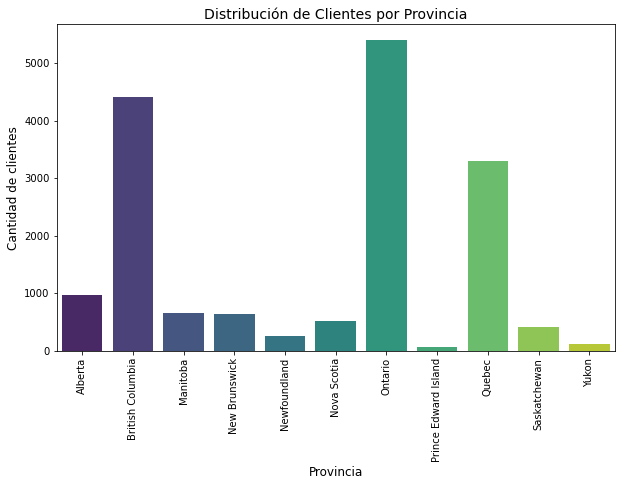

In [40]:
# Crear un barplot con los datos agrupados
plt.figure(figsize=(10,6))
sns.barplot(data=clientes_provincia, 
            x='Province', 
            y= 'Cantidad de clientes' , 
            palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.title('Distribución de Clientes por Provincia', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar los nombres de las provincias si son demasiadas
plt.show()


In [ ]:
# QUIERO DESTACAR 3 PROVINCIAS
#'British Columbia', 'Ontario', 'Quebec' por que tienen tres ciudades mas pobladas que son respectivamente
# Vancouver, Toronto y Montreal

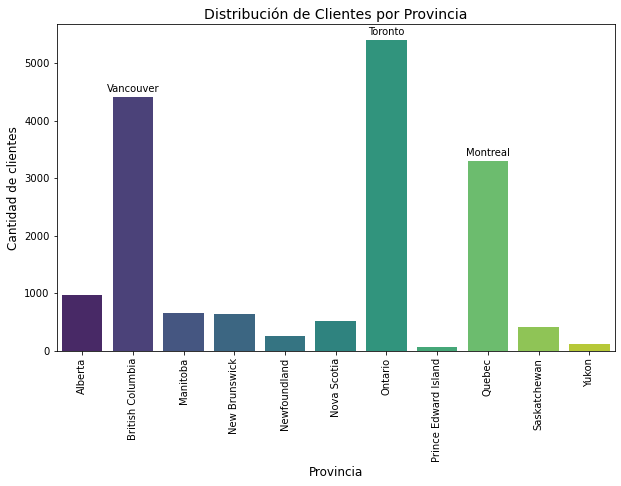

In [44]:
# Crear un barplot con los datos agrupados
plt.figure(figsize=(10,6))
sns.barplot(data=clientes_provincia, 
            x='Province', 
            y= 'Cantidad de clientes' , 
            palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.title('Distribución de Clientes por Provincia', fontsize=14)

# Agregar etiquetas personalizadas a las barras esto lo he buscado yo sola no sabria hacerlo pero lo puedo leer 
plt.annotate('Vancouver', xy=('British Columbia', clientes_provincia[clientes_provincia['Province'] == 'British Columbia']['Cantidad de clientes'].values[0]), xytext=(0, 5), textcoords='offset points', ha='center')
plt.annotate('Toronto', xy=('Ontario', clientes_provincia[clientes_provincia['Province'] == 'Ontario']['Cantidad de clientes'].values[0]), xytext=(0, 5), textcoords='offset points', ha='center')
plt.annotate('Montreal', xy=('Quebec', clientes_provincia[clientes_provincia['Province'] == 'Quebec']['Cantidad de clientes'].values[0]), xytext=(0, 5), textcoords='offset points', ha='center')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar los nombres de las provincias si son demasiadas
plt.show()

# FASE II:VISUALIZACIÓN
### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?



In [ ]:
# corregir los salarios negativos
# las correcciones pueden ser pasarlos a nulos o pasarlos a positivos
#df2['Salary'] = df2['Salary'].apply(lambda x: abs(x) if x < 0 else x)
#df2['Salary'] = df2['Salary'].apply(lambda x: None if x < 0 else x)

In [45]:
df2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [46]:
df2['Marital Status'].value_counts()

Married     9735
Single      4484
Divorced    2518
Name: Marital Status, dtype: int64

In [47]:
df2['Education'].value_counts()

Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: Education, dtype: int64

In [48]:
# Como sólo hay 3 columnas de las 16 que tienen nulos vamos hacer que se impriman solo las nulas
# por lo que le vamos a decir que me imprima sólo las que sean mayor a cero
# que la cancelación de año y mes tengan la misma cantidad de nulos podemos deducir xxxx
columnas_con_nulos = df2.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]
print(columnas_con_nulos)

Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [49]:
# El resultado arroja un valor negativo en el salario y no le encuentro lógica voy averiguar si es un error
df2['Salary'].value_counts()

 101933.0    23
 62283.0     14
 61809.0     14
 51573.0     14
 64001.0     13
             ..
 95907.0      1
 72440.0      1
 88633.0      1
 100572.0     1
-57297.0      1
Name: Salary, Length: 5890, dtype: int64

In [50]:
# Vamos a intentar contar los salarios negativos que hay en la base de datos
salario_negativo = df2[df2['Salary'] < 0]
cuenta_salario_negativo = salario_negativo.shape[0]
print(f"Número de salarios negativos: {cuenta_salario_negativo}")

Número de salarios negativos: 20


In [51]:
# quiero ver las columnas no sé si sirve pero me ayuda
# ¡¡¡¡¡decision!!! tendre que hacerlos nulos o darles valor +
salario_negativo

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [54]:
# voy a usar apply para transformar los salarios negativos en positivos
# en los apuntes usamos el método apply () y usaremos la funcion lambda es del Módulo 1
# enla columna salario transformame el valor negativo en positivo
df2['Salary'] = df2['Salary'].apply(lambda x: abs(x) if x < 0 else x)

# Verificar si los salarios negativos han sido corregidos
salario_negativo = df2[df2['Salary'] < 0]
cuenta_salario_negativo = salario_negativo.shape[0]
print(f"Número de salarios negativos después de la corrección: {cuenta_salario_negativo}")


Número de salarios negativos después de la corrección: 0


In [59]:
# voy agrupar en un df para trabajar mejor y calcular el promedio 
df_salario_nivel_educ = df2.groupby('Education')['Salary'].mean().reset_index()

print(df_salario_nivel_educ)

              Education         Salary
0              Bachelor   72577.254415
1               College            NaN
2                Doctor  178608.897820
3  High School or Below   61199.161125
4                Master  103757.848425


In [60]:
# Contar el total de valores nulos en la columna 'Salary'
salarios_nulos = df2['Salary'].isnull().sum()
print(f"Total de salarios nulos: {salarios_nulos}")


Total de salarios nulos: 4238


In [62]:
# Verificar si hay valores nulos para "College" 
college_salarios = df2[df2['Education'] == 'College']
print(college_salarios[['Education', 'Salary']].isnull().sum())


Education       0
Salary       4238
dtype: int64


In [63]:
# como no sabia que hacer he buscado en internet 
# me dice que use el metodo "fillna" en los apuntes me explica que es un metodo para cubrir con un promedio
# Reemplazar valores nulos en 'Salary' con la mediana del salario
# el inplace es un valor booleanao para  modificar el valor original TRUE
median_salary = df2['Salary'].median()
df2['Salary'].fillna(median_salary, inplace=True)


In [64]:
# voy agrupar en un df para trabajar mejor y calcular el promedio  NUEVO
df_salario_nivel_educ = df2.groupby('Education')['Salary'].mean().reset_index()

print(df_salario_nivel_educ)

              Education         Salary
0              Bachelor   72577.254415
1               College   73455.000000
2                Doctor  178608.897820
3  High School or Below   61199.161125
4                Master  103757.848425


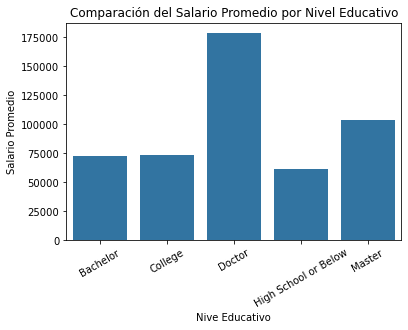

In [70]:
# Crear un gráfico de barras
sns.barplot(x='Education', y='Salary', data=df_salario_nivel_educ)
plt.xlabel('Nive Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación del Salario Promedio por Nivel Educativo')
plt.xticks(rotation=30)  # Rotar los nombres de las provincias si son demasiadas
plt.show()

# FASE II:VISUALIZACIÓN
### 5. ¿Cuál es la proporcion de clientes con diferentes tipos de tarjetas de fidelidad?

In [71]:
df2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [ ]:
# vamos a usar la varible 'Loyalty Number' 'Loyalty Card'

In [72]:
df2['Loyalty Card'].value_counts()

Star      7637
Nova      5671
Aurora    3429
Name: Loyalty Card, dtype: int64

In [76]:
# voy agrupar en un df para trabajar mejor y calcular el promedio
df2_tipo_de_tarjeta = df2.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()

print(df2_tipo_de_tarjeta)

  Loyalty Card  Loyalty Number
0       Aurora            3429
1         Nova            5671
2         Star            7637


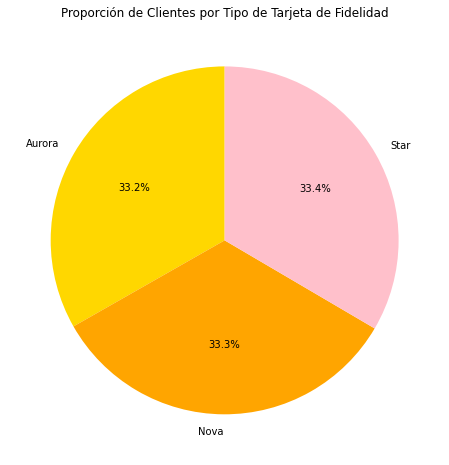

In [88]:
# Definir los colores
colores = ['gold', 'orange', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(df2_tipo_de_tarjeta['Loyalty Number'], labels=df2_tipo_de_tarjeta['Loyalty Card'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colores); 

# Añadir un título
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')


# Mostrar el gráfico
plt.show()


# FASE II:VISUALIZACIÓN
### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:

# 'Marital Status''Gender''Loyalty Number'

In [95]:
# voy agrupar en un df para trabajar mejor
# voy agrupar en un df para trabajar mejor y calcular el promedio
df2_estado_civil = df2.groupby('Marital Status')['Loyalty Number'].count().reset_index()

print(df2_estado_civil)


  Marital Status  Loyalty Number
0       Divorced            2518
1        Married            9735
2         Single            4484


In [96]:
# voy agrupar en un df para trabajar mejor
# voy agrupar en un df para trabajar mejor y calcular el promedio
df2_genero = df2.groupby('Gender')['Loyalty Number'].count().reset_index()

print(df2_genero)

   Gender  Loyalty Number
0  Female            8410
1    Male            8327


In [97]:
# Agrupar por género y estado civil, y contar la cantidad de clientes en cada grupo
df2_genero_estado_civil = df2.groupby(['Gender', 'Marital Status'])['Loyalty Number'].count().reset_index()

# Renombrar la columna de 'Loyalty Number' para mayor claridad
df2_genero_estado_civil = df2_genero_estado_civil.rename(columns={'Loyalty Number': 'Cantidad de Clientes'})

# Mostrar el resultado
print(df2_genero_estado_civil)


   Gender Marital Status  Cantidad de Clientes
0  Female       Divorced                  1269
1  Female        Married                  4869
2  Female         Single                  2272
3    Male       Divorced                  1249
4    Male        Married                  4866
5    Male         Single                  2212


In [103]:
# Crear un conjunto de datos para mujer y otro para hombre
df2_mujer = df2_genero_estado_civil [df2_genero_estado_civil ['Gender']== 'Female']
df2_hombre = df2_genero_estado_civil [df2_genero_estado_civil['Gender']== 'Male']

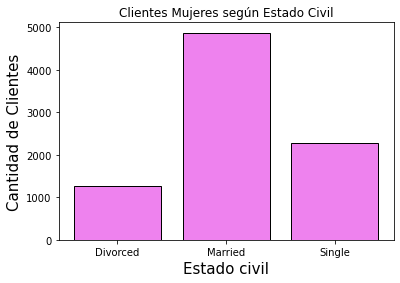

In [104]:
# Crear un gráfico de barras para mujeres
plt.bar(df2_mujer['Marital Status'], df2_mujer['Cantidad de Clientes'], color="violet", edgecolor="black")

# Añado las etiquetas del eje x y el y, título del gráfico y colores 
plt.xlabel('Estado civil', fontsize=15)
plt.ylabel('Cantidad de Clientes', fontsize=15)
plt.title('Clientes Mujeres según Estado Civil')

# Mostrar el gráfico
plt.show()


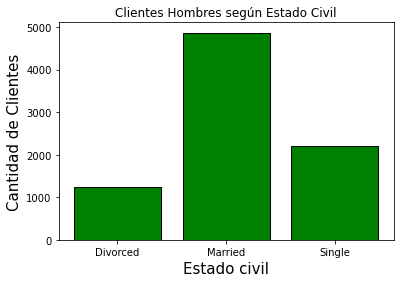

In [106]:
# Crear un gráfico de barras para hombres
plt.bar(df2_hombre['Marital Status'], df2_hombre['Cantidad de Clientes'], color="green", edgecolor="black")

# Añado las etiquetas del eje x y el y, título del gráfico y colores 
plt.xlabel('Estado civil', fontsize=15)
plt.ylabel('Cantidad de Clientes', fontsize=15)
plt.title('Clientes Hombres según Estado Civil')

# Mostrar el gráfico
plt.show()


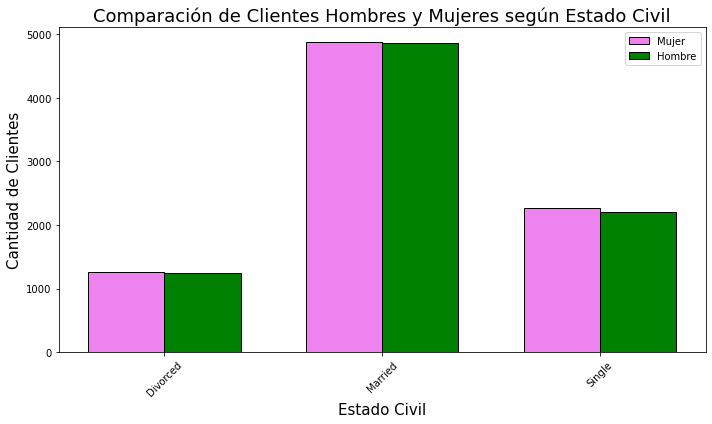

In [108]:
# Crear los datos necesarios para el gráfico
estado_civil = df2_genero_estado_civil['Marital Status'].unique()

# Alinear las barras con base en los estados civiles ESTO NO ME SALIA LO HE TENIDO QUE MIRAR 
mujer_vals = df2_mujer.set_index('Marital Status').reindex(estado_civil)['Cantidad de Clientes'].fillna(0).values
hombre_vals = df2_hombre.set_index('Marital Status').reindex(estado_civil)['Cantidad de Clientes'].fillna(0).values

# Configuración del gráfico
width = 0.35  # Ancho de las barras
x = np.arange(len(estado_civil))  # La posición de las etiquetas del eje x

plt.figure(figsize=(10, 6))

# Crear barras para mujeres y hombres
plt.bar(x - width/2, mujer_vals, width, label='Mujer', color="violet", edgecolor="black")
plt.bar(x + width/2, hombre_vals, width, label='Hombre', color="green", edgecolor="black")

# Añadir etiquetas y formato
plt.xlabel('Estado Civil', fontsize=15)
plt.ylabel('Cantidad de Clientes', fontsize=15)
plt.title('Comparación de Clientes Hombres y Mujeres según Estado Civil', fontsize=18)
plt.xticks(x, estado_civil, rotation=45)  # Colocar etiquetas del eje x
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()